In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler


<b>
* id - unique identificator<br>
* Product ID - unique identificator of product (machine), e.g. "L50096"<br>
* Type - type of product (machine), e.g. "L"<br>
* Air temperature [K] - temperature of air measured in Kelvin, e.g. 300.6<br>
* Process temperature [K] - temperature of process measured in Kelvin, e.g. 312.1<br>
* Rotational speed [rpm] - speed<br>
* Torque [Nm] - torque of machine during process<br>
* Tool wear [min] - usage of machine during process<br>
* Machine failure - Target column (0 - machine is working, 1 - machine failure)<br>
* TWF -|<br>
* HDF -|<br>
* PWF --> Possible type of machine failure (hypothesis)<br>
* OSF -|<br>
* RNF -|<br>

</b>

# Exploratory Data Analysis

<b> Importing Data </b>

In [2]:
data_frame = pd.read_csv('train.csv')
data_frame.head(6)

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   
5   5     M24300    M                298.4                    308.9   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   
5                    1429         42.1               65                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
5    0    0    0    0

In [3]:
data_frame.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [4]:
data_frame.shape

(136429, 14)

<b> Checking for Null/empty values and duplicated rows </b>

In [5]:
data_frame.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
data_frame.shape

(136429, 14)

<b>Dataset Description </b>

In [7]:
data_frame.describe().T

count          mean           std     min  \
id                       136429.0  68214.000000  39383.804275     0.0   
Air temperature [K]      136429.0    299.862776      1.862247   295.3   
Process temperature [K]  136429.0    309.941070      1.385173   305.8   
Rotational speed [rpm]   136429.0   1520.331110    138.736632  1181.0   
Torque [Nm]              136429.0     40.348643      8.502229     3.8   
Tool wear [min]          136429.0    104.408901     63.965040     0.0   
Machine failure          136429.0      0.015744      0.124486     0.0   
TWF                      136429.0      0.001554      0.039389     0.0   
HDF                      136429.0      0.005160      0.071649     0.0   
PWF                      136429.0      0.002397      0.048899     0.0   
OSF                      136429.0      0.003958      0.062789     0.0   
RNF                      136429.0      0.002258      0.047461     0.0   

                             25%      50%       75%       max  
id                       34107.0  68214.0  102321.0  136428.0  
Air temperature [K]        298.3    300.0     301.2     304.4  
Process temperature [K]    308.7    310.0     310.9     313.8  
Rotational speed [rpm]    1432.0   1493.0    1580.0    2886.0  
Torque [Nm]                 34.6     40.4      46.1      76.6  
Tool wear [min]             48.0    106.0     159.0     253.0  
Machine failure              0.0      0.0       0.0       1.0  
TWF                          0.0      0.0       0.0       1.0  
HDF                          0.0      0.0       0.0       1.0  
PWF                          0.0      0.0       0.0       1.0  
OSF                          0.0      0.0       0.0       1.0  
RNF                          0.0      0.0       0.0       1.0

<b> Unique Values in Dataset </b>

In [8]:
data_frame.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

<b>
Summary<br>
* The Product ID column doesnt help much in prediction so it will be droped in preprocessing.<br>
* The column id is an ordinal identifier of the row, this column will be dropped soon in the preprocessing.<br>
* The Type column is a part of the Product ID and may be useful in a future modelling and cannot be linked to a specific product.<br>
* Columns TWF, HDF, PWF, OSF, RNF are binary columns. They have not been described what these abbreviations stand for, but they can be related to machine failure (because of the letter 'F').<br>
</b>

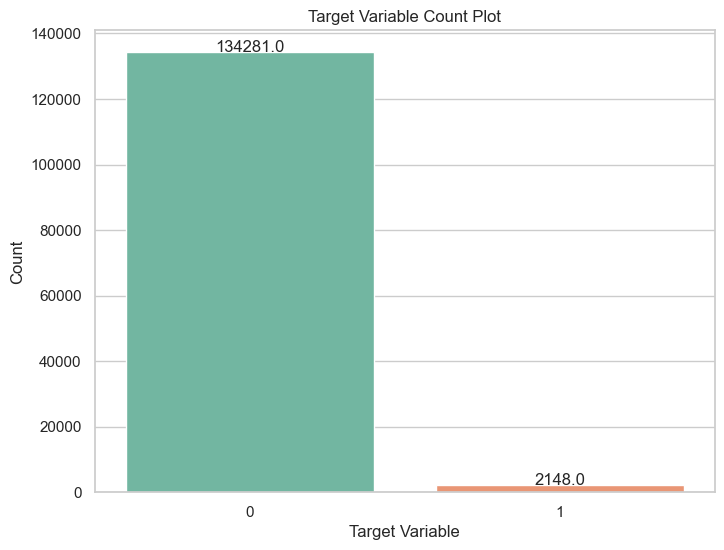

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data_frame, x='Machine failure', palette='Set2')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Target Variable Count Plot')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

<b>
Summary<br>
* Data are highly imbalanced<br>
* In the dataset there are only 2148 Machine failures and 134281 are examples where the machine doesnt fail<br>
</b>

# Pair Plot

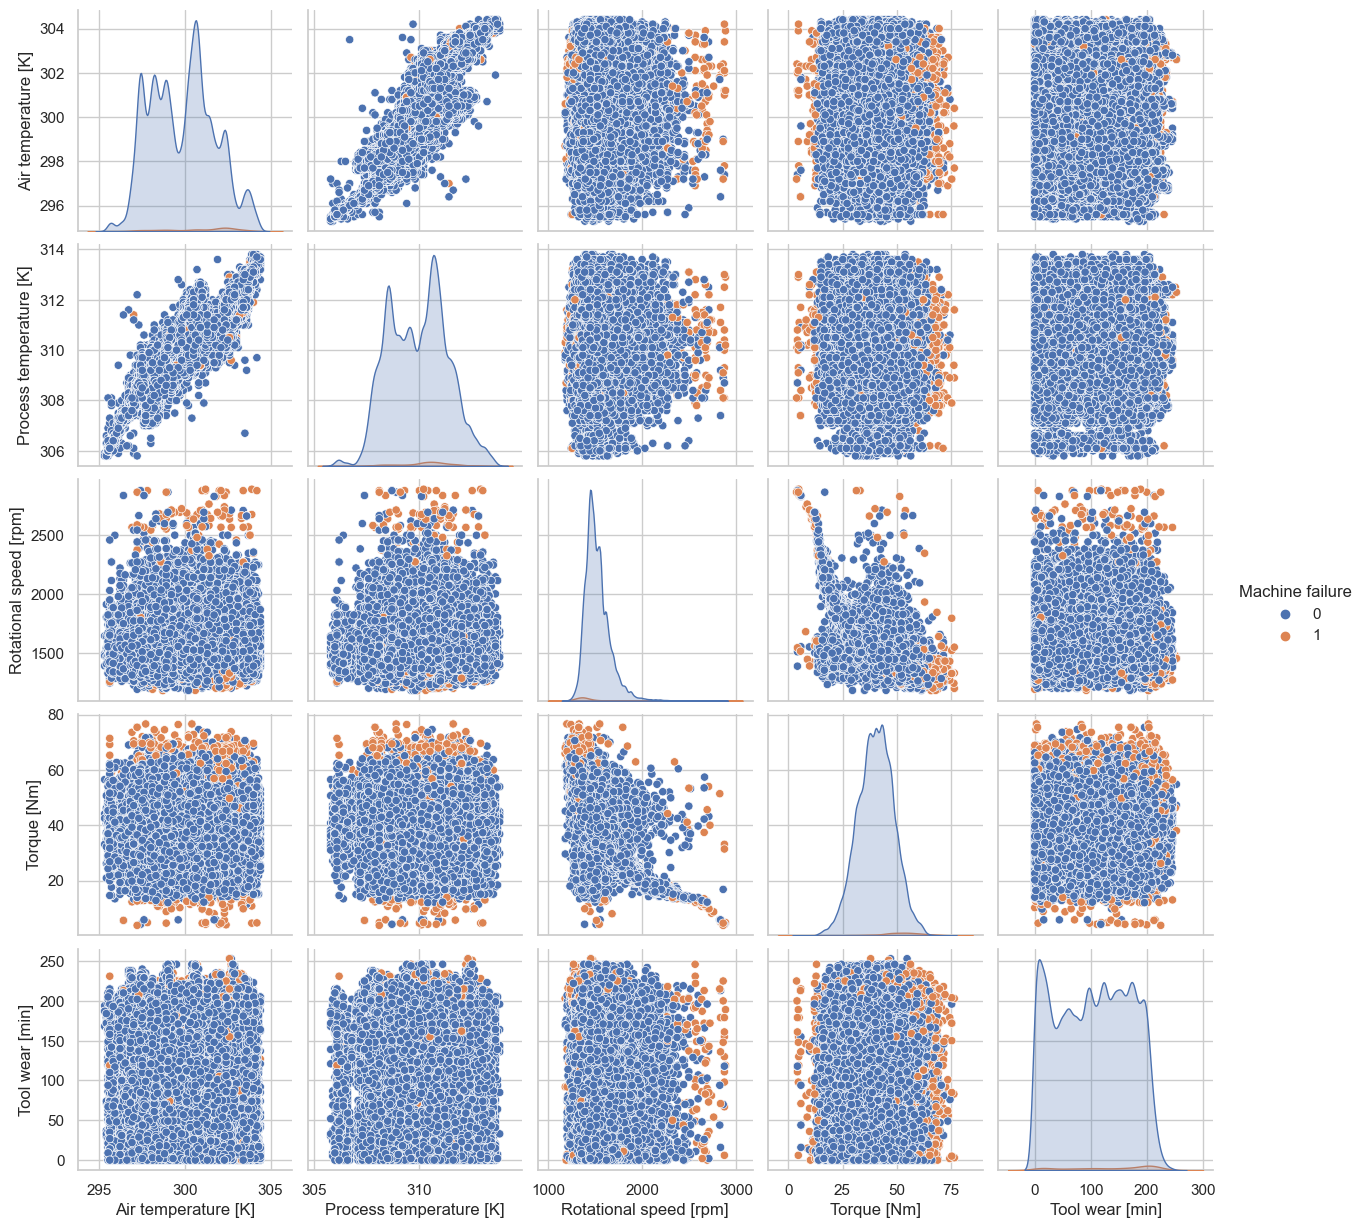

In [13]:
sns.pairplot(data=data_frame, vars=['Air temperature [K]', 'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]'], hue='Machine failure')
plt.show()

# Histogram for machine failure featurewise

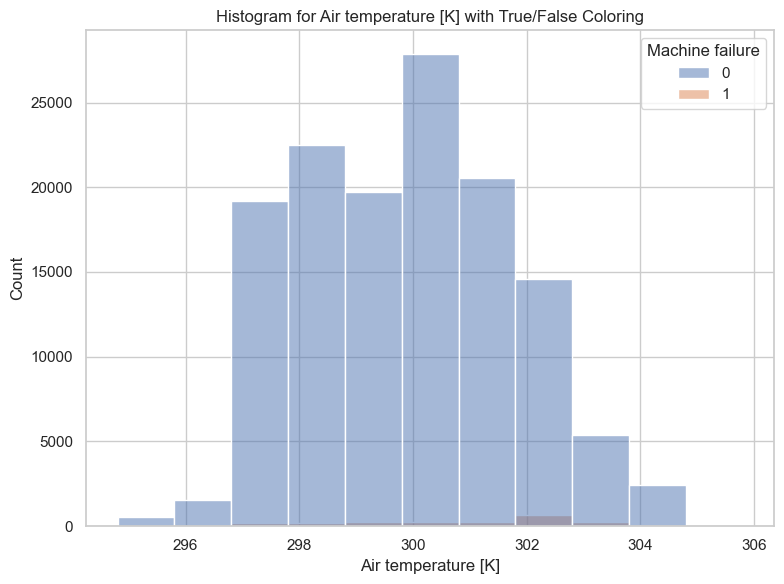

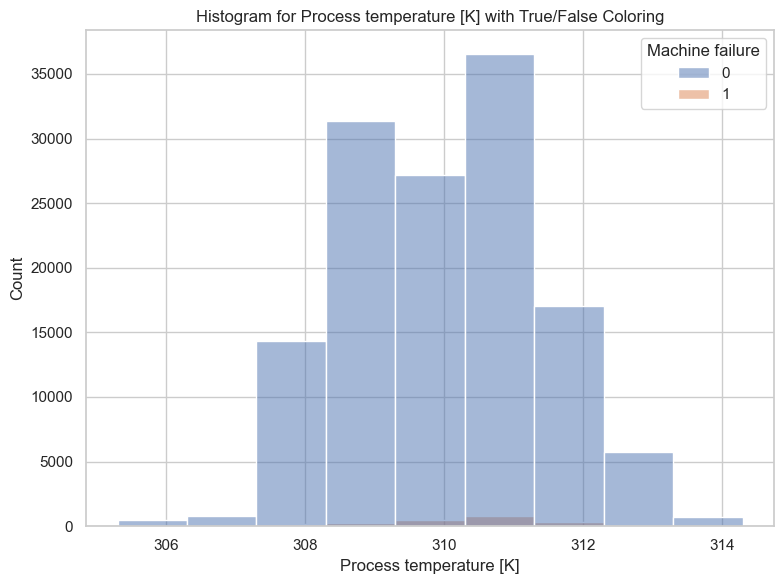

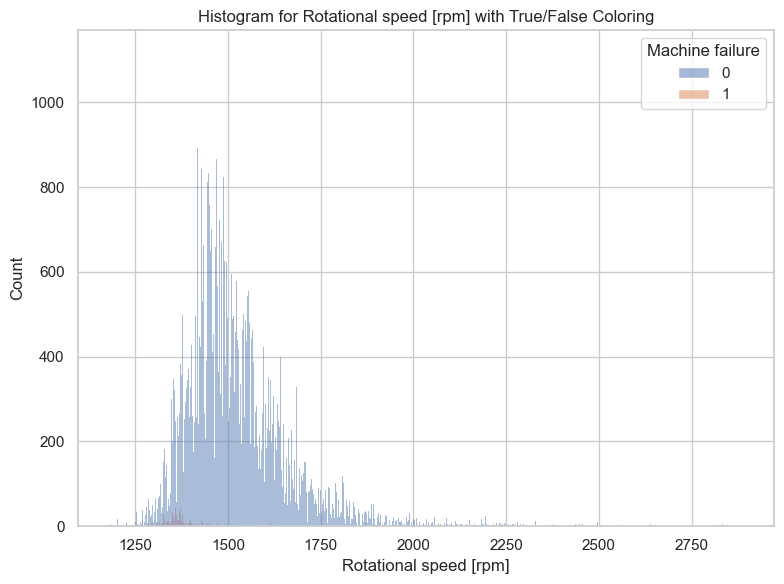

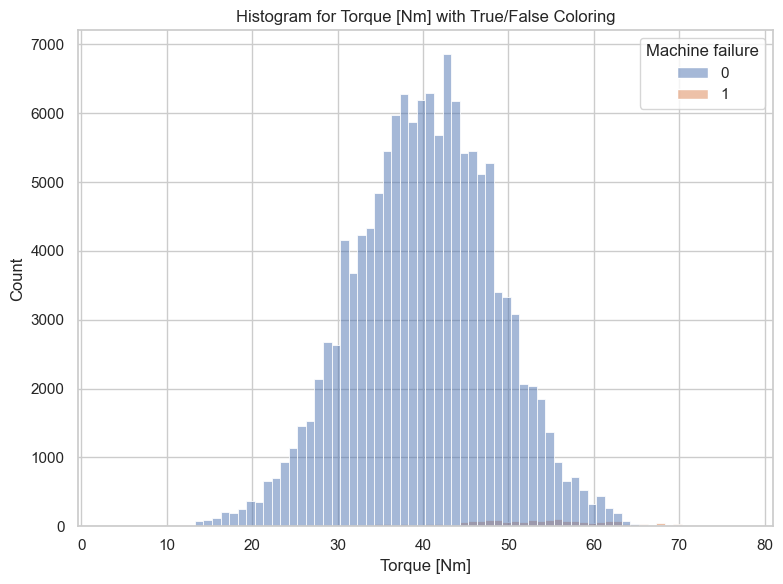

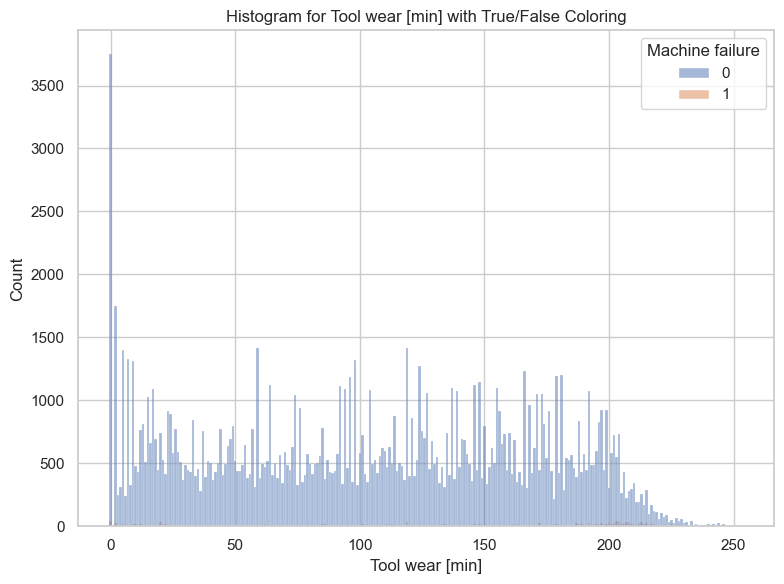

In [14]:
features = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data_frame, x=feature, stat='count', hue='Machine failure', discrete=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram for {feature} with True/False Coloring')
    plt.tight_layout()

    plt.show()

In [11]:
data_frame.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

# Pre Processing

In [12]:
data_frame=data_frame.drop(['id','Product ID',],axis=1)
data_frame.duplicated().sum()

1156

In [13]:
data_frame = data_frame.drop_duplicates()
data_frame

Type  Air temperature [K]  Process temperature [K]  \
0         L                300.6                    309.6   
1         M                302.6                    312.1   
2         L                299.3                    308.5   
3         L                301.0                    310.9   
4         M                298.0                    309.0   
...     ...                  ...                      ...   
136424    M                300.1                    311.4   
136425    H                297.5                    308.5   
136426    L                300.5                    311.8   
136427    L                301.7                    310.9   
136428    L                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  RNF  
0         0    0    0    0    0  
1         0    0    0    0    0  
2         0    0    0    0    0  
3         0    0    0    0    0  
4         0    0    0    0    0  
...     ...  ...  ...  ...  ...  
136424    0    0    0    0    0  
136425    0    0    0    0    0  
136426    0    0    0    0    0  
136427    0    0    0    0    0  
136428    0    0    0    0    0  

[135273 rows x 12 columns]

In [14]:
data_frame.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [15]:
df_encoded = pd.get_dummies(data_frame, columns=['Type'], prefix='Enc')
df_encoded

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                     300.6                    309.6                    1596   
1                     302.6                    312.1                    1759   
2                     299.3                    308.5                    1805   
3                     301.0                    310.9                    1524   
4                     298.0                    309.0                    1641   
...                     ...                      ...                     ...   
136424                300.1                    311.4                    1530   
136425                297.5                    308.5                    1447   
136426                300.5                    311.8                    1524   
136427                301.7                    310.9                    1447   
136428                296.9                    308.1                    1557   

        Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  \
0              36.1              140                0    0    0    0    0   
1              29.1              200                0    0    0    0    0   
2              26.5               25                0    0    0    0    0   
3              44.3              197                0    0    0    0    0   
4              35.4               34                0    0    0    0    0   
...             ...              ...              ...  ...  ...  ...  ...   
136424         37.5              210                0    0    0    0    0   
136425         49.1                2                0    0    0    0    0   
136426         38.5              214                0    0    0    0    0   
136427         46.3               42                0    0    0    0    0   
136428         39.3              229                0    0    0    0    0   

        RNF  Enc_H  Enc_L  Enc_M  
0         0  False   True  False  
1         0  False  False   True  
2         0  False   True  False  
3         0  False   True  False  
4         0  False  False   True  
...     ...    ...    ...    ...  
136424    0  False  False   True  
136425    0   True  False  False  
136426    0  False   True  False  
136427    0  False   True  False  
136428    0  False   True  False  

[135273 rows x 14 columns]

In [16]:
y = df_encoded['Machine failure']
y

0         0
1         0
2         0
3         0
4         0
         ..
136424    0
136425    0
136426    0
136427    0
136428    0
Name: Machine failure, Length: 135273, dtype: int64

In [17]:
df_encoded=df_encoded.drop(['Machine failure'],axis=1)
df_encoded

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                     300.6                    309.6                    1596   
1                     302.6                    312.1                    1759   
2                     299.3                    308.5                    1805   
3                     301.0                    310.9                    1524   
4                     298.0                    309.0                    1641   
...                     ...                      ...                     ...   
136424                300.1                    311.4                    1530   
136425                297.5                    308.5                    1447   
136426                300.5                    311.8                    1524   
136427                301.7                    310.9                    1447   
136428                296.9                    308.1                    1557   

        Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  RNF  Enc_H  Enc_L  \
0              36.1              140    0    0    0    0    0  False   True   
1              29.1              200    0    0    0    0    0  False  False   
2              26.5               25    0    0    0    0    0  False   True   
3              44.3              197    0    0    0    0    0  False   True   
4              35.4               34    0    0    0    0    0  False  False   
...             ...              ...  ...  ...  ...  ...  ...    ...    ...   
136424         37.5              210    0    0    0    0    0  False  False   
136425         49.1                2    0    0    0    0    0   True  False   
136426         38.5              214    0    0    0    0    0  False   True   
136427         46.3               42    0    0    0    0    0  False   True   
136428         39.3              229    0    0    0    0    0  False   True   

        Enc_M  
0       False  
1        True  
2       False  
3       False  
4        True  
...       ...  
136424   True  
136425  False  
136426  False  
136427  False  
136428  False  

[135273 rows x 13 columns]

# HeatMap

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True)
plt.show()

# Feature Engineering

In [19]:
df_encoded['Power'] = df_encoded['Torque [Nm]']*df_encoded['Tool wear [min]']
df_encoded

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                     300.6                    309.6                    1596   
1                     302.6                    312.1                    1759   
2                     299.3                    308.5                    1805   
3                     301.0                    310.9                    1524   
4                     298.0                    309.0                    1641   
...                     ...                      ...                     ...   
136424                300.1                    311.4                    1530   
136425                297.5                    308.5                    1447   
136426                300.5                    311.8                    1524   
136427                301.7                    310.9                    1447   
136428                296.9                    308.1                    1557   

        Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  RNF  Enc_H  Enc_L  \
0              36.1              140    0    0    0    0    0  False   True   
1              29.1              200    0    0    0    0    0  False  False   
2              26.5               25    0    0    0    0    0  False   True   
3              44.3              197    0    0    0    0    0  False   True   
4              35.4               34    0    0    0    0    0  False  False   
...             ...              ...  ...  ...  ...  ...  ...    ...    ...   
136424         37.5              210    0    0    0    0    0  False  False   
136425         49.1                2    0    0    0    0    0   True  False   
136426         38.5              214    0    0    0    0    0  False   True   
136427         46.3               42    0    0    0    0    0  False   True   
136428         39.3              229    0    0    0    0    0  False   True   

        Enc_M   Power  
0       False  5054.0  
1        True  5820.0  
2       False   662.5  
3       False  8727.1  
4        True  1203.6  
...       ...     ...  
136424   True  7875.0  
136425  False    98.2  
136426  False  8239.0  
136427  False  1944.6  
136428  False  8999.7  

[135273 rows x 14 columns]

In [20]:
df_encoded['Temp Diff'] = np.abs(df_encoded['Air temperature [K]'] - df_encoded['Process temperature [K]'])
df_encoded["Temp Ratio"] = df_encoded["Process temperature [K]"]/df_encoded["Air temperature [K]"]
df_encoded

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                     300.6                    309.6                    1596   
1                     302.6                    312.1                    1759   
2                     299.3                    308.5                    1805   
3                     301.0                    310.9                    1524   
4                     298.0                    309.0                    1641   
...                     ...                      ...                     ...   
136424                300.1                    311.4                    1530   
136425                297.5                    308.5                    1447   
136426                300.5                    311.8                    1524   
136427                301.7                    310.9                    1447   
136428                296.9                    308.1                    1557   

        Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  RNF  Enc_H  Enc_L  \
0              36.1              140    0    0    0    0    0  False   True   
1              29.1              200    0    0    0    0    0  False  False   
2              26.5               25    0    0    0    0    0  False   True   
3              44.3              197    0    0    0    0    0  False   True   
4              35.4               34    0    0    0    0    0  False  False   
...             ...              ...  ...  ...  ...  ...  ...    ...    ...   
136424         37.5              210    0    0    0    0    0  False  False   
136425         49.1                2    0    0    0    0    0   True  False   
136426         38.5              214    0    0    0    0    0  False   True   
136427         46.3               42    0    0    0    0    0  False   True   
136428         39.3              229    0    0    0    0    0  False   True   

        Enc_M   Power  Temp Diff  Temp Ratio  
0       False  5054.0        9.0    1.029940  
1        True  5820.0        9.5    1.031395  
2       False   662.5        9.2    1.030738  
3       False  8727.1        9.9    1.032890  
4        True  1203.6       11.0    1.036913  
...       ...     ...        ...         ...  
136424   True  7875.0       11.3    1.037654  
136425  False    98.2       11.0    1.036975  
136426  False  8239.0       11.3    1.037604  
136427  False  1944.6        9.2    1.030494  
136428  False  8999.7       11.2    1.037723  

[135273 rows x 16 columns]

In [21]:
scaler = StandardScaler()
columns_to_standardize = df_encoded[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Power', 'Temp Diff','Temp Ratio']]

scaled_data = scaler.fit_transform(columns_to_standardize)
scaled_data = pd.DataFrame(scaled_data, columns=columns_to_standardize.columns)

scaled_data.reset_index(drop=True, inplace=True)
df_encoded.reset_index(drop=True, inplace=True)

result = pd.concat([scaled_data, df_encoded.drop(columns=columns_to_standardize.columns)], axis=1)
result

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                  0.395546                -0.246363                0.545666   
1                  1.469284                 1.558786                1.721283   
2                 -0.302383                -1.040629                2.053052   
3                  0.610294                 0.692315                0.026375   
4                 -1.000313                -0.679599                0.870222   
...                     ...                      ...                     ...   
135268             0.127112                 1.053344                0.069649   
135269            -1.268747                -1.040629               -0.528978   
135270             0.341860                 1.342168                0.026375   
135271             0.986102                 0.692315               -0.528978   
135272            -1.590869                -1.329453                0.264383   

        Torque [Nm]  Tool wear [min]     Power  Temp Diff  Temp Ratio  TWF  \
0         -0.499439         0.557371  0.304198  -1.093499   -1.074094    0   
1         -1.323638         1.495664  0.579971  -0.586292   -0.650003    0   
2         -1.629769        -1.241024 -1.276821  -0.890616   -0.841335    0   
3          0.466051         1.448750  1.626580  -0.180526   -0.213862    0   
4         -0.581859        -1.100280 -1.082015   0.935331    0.958984    0   
...             ...              ...       ...        ...         ...  ...   
135268    -0.334599         1.652046  1.319808   1.239655    1.175151    0   
135269     1.031216        -1.600703 -1.479979   0.935331    0.977073    0   
135270    -0.216856         1.714599  1.450855   1.239655    1.160536    0   
135271     0.701537        -0.975174 -0.815242  -0.890616   -0.912633    0   
135272    -0.122662         1.949172  1.724721   1.138214    1.195277    0   

        HDF  PWF  OSF  RNF  Enc_H  Enc_L  Enc_M  
0         0    0    0    0  False   True  False  
1         0    0    0    0  False  False   True  
2         0    0    0    0  False   True  False  
3         0    0    0    0  False   True  False  
4         0    0    0    0  False  False   True  
...     ...  ...  ...  ...    ...    ...    ...  
135268    0    0    0    0  False  False   True  
135269    0    0    0    0   True  False  False  
135270    0    0    0    0  False   True  False  
135271    0    0    0    0  False   True  False  
135272    0    0    0    0  False   True  False  

[135273 rows x 16 columns]

# Model Training

In [428]:
X = result
X

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                  0.395546                -0.246363                0.545666   
1                  1.469284                 1.558786                1.721283   
2                 -0.302383                -1.040629                2.053052   
3                  0.610294                 0.692315                0.026375   
4                 -1.000313                -0.679599                0.870222   
...                     ...                      ...                     ...   
135268             0.127112                 1.053344                0.069649   
135269            -1.268747                -1.040629               -0.528978   
135270             0.341860                 1.342168                0.026375   
135271             0.986102                 0.692315               -0.528978   
135272            -1.590869                -1.329453                0.264383   

        Torque [Nm]  Tool wear [min]     Power  Temp Diff  Temp Ratio  TWF  \
0         -0.499439         0.557371  0.304198  -1.093499   -1.074094    0   
1         -1.323638         1.495664  0.579971  -0.586292   -0.650003    0   
2         -1.629769        -1.241024 -1.276821  -0.890616   -0.841335    0   
3          0.466051         1.448750  1.626580  -0.180526   -0.213862    0   
4         -0.581859        -1.100280 -1.082015   0.935331    0.958984    0   
...             ...              ...       ...        ...         ...  ...   
135268    -0.334599         1.652046  1.319808   1.239655    1.175151    0   
135269     1.031216        -1.600703 -1.479979   0.935331    0.977073    0   
135270    -0.216856         1.714599  1.450855   1.239655    1.160536    0   
135271     0.701537        -0.975174 -0.815242  -0.890616   -0.912633    0   
135272    -0.122662         1.949172  1.724721   1.138214    1.195277    0   

        HDF  PWF  OSF  RNF  Enc_H  Enc_L  Enc_M  
0         0    0    0    0  False   True  False  
1         0    0    0    0  False  False   True  
2         0    0    0    0  False   True  False  
3         0    0    0    0  False   True  False  
4         0    0    0    0  False  False   True  
...     ...  ...  ...  ...    ...    ...    ...  
135268    0    0    0    0  False  False   True  
135269    0    0    0    0   True  False  False  
135270    0    0    0    0  False   True  False  
135271    0    0    0    0  False   True  False  
135272    0    0    0    0  False   True  False  

[135273 rows x 16 columns]

In [429]:
X.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Power',
       'Temp Diff', 'Temp Ratio', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Enc_H',
       'Enc_L', 'Enc_M'],
      dtype='object')

In [430]:
X

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                  0.395546                -0.246363                0.545666   
1                  1.469284                 1.558786                1.721283   
2                 -0.302383                -1.040629                2.053052   
3                  0.610294                 0.692315                0.026375   
4                 -1.000313                -0.679599                0.870222   
...                     ...                      ...                     ...   
135268             0.127112                 1.053344                0.069649   
135269            -1.268747                -1.040629               -0.528978   
135270             0.341860                 1.342168                0.026375   
135271             0.986102                 0.692315               -0.528978   
135272            -1.590869                -1.329453                0.264383   

        Torque [Nm]  Tool wear [min]     Power  Temp Diff  Temp Ratio  TWF  \
0         -0.499439         0.557371  0.304198  -1.093499   -1.074094    0   
1         -1.323638         1.495664  0.579971  -0.586292   -0.650003    0   
2         -1.629769        -1.241024 -1.276821  -0.890616   -0.841335    0   
3          0.466051         1.448750  1.626580  -0.180526   -0.213862    0   
4         -0.581859        -1.100280 -1.082015   0.935331    0.958984    0   
...             ...              ...       ...        ...         ...  ...   
135268    -0.334599         1.652046  1.319808   1.239655    1.175151    0   
135269     1.031216        -1.600703 -1.479979   0.935331    0.977073    0   
135270    -0.216856         1.714599  1.450855   1.239655    1.160536    0   
135271     0.701537        -0.975174 -0.815242  -0.890616   -0.912633    0   
135272    -0.122662         1.949172  1.724721   1.138214    1.195277    0   

        HDF  PWF  OSF  RNF  Enc_H  Enc_L  Enc_M  
0         0    0    0    0  False   True  False  
1         0    0    0    0  False  False   True  
2         0    0    0    0  False   True  False  
3         0    0    0    0  False   True  False  
4         0    0    0    0  False  False   True  
...     ...  ...  ...  ...    ...    ...    ...  
135268    0    0    0    0  False  False   True  
135269    0    0    0    0   True  False  False  
135270    0    0    0    0  False   True  False  
135271    0    0    0    0  False   True  False  
135272    0    0    0    0  False   True  False  

[135273 rows x 16 columns]

In [431]:
y

0         0
1         0
2         0
3         0
4         0
         ..
136424    0
136425    0
136426    0
136427    0
136428    0
Name: Machine failure, Length: 135273, dtype: int64

In [432]:
X.shape,y.shape

((135273, 16), (135273,))

In [433]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=2529)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
y_test_g = y_test

In [2]:
from catboost import CatBoostClassifier



In [3]:
model = CatBoostClassifier()


In [436]:
model.fit(X_train, y_train)

0:	learn: 0.6007370	total: 5.74ms	remaining: 569ms
1:	learn: 0.5251687	total: 8.21ms	remaining: 402ms
2:	learn: 0.4622104	total: 9.97ms	remaining: 323ms
3:	learn: 0.4090633	total: 12ms	remaining: 288ms
4:	learn: 0.3630224	total: 13.8ms	remaining: 263ms
5:	learn: 0.3239248	total: 15.7ms	remaining: 246ms
6:	learn: 0.2900069	total: 17.8ms	remaining: 237ms
7:	learn: 0.2598970	total: 19.7ms	remaining: 226ms
8:	learn: 0.2344707	total: 22.3ms	remaining: 226ms
9:	learn: 0.2112321	total: 24.6ms	remaining: 221ms
10:	learn: 0.1906664	total: 27.2ms	remaining: 220ms
11:	learn: 0.1725704	total: 29.6ms	remaining: 217ms
12:	learn: 0.1565026	total: 32ms	remaining: 214ms
13:	learn: 0.1422853	total: 34.5ms	remaining: 212ms
14:	learn: 0.1296369	total: 36.7ms	remaining: 208ms
15:	learn: 0.1182847	total: 38.9ms	remaining: 204ms
16:	learn: 0.1081963	total: 41.5ms	remaining: 202ms
17:	learn: 0.0992106	total: 43.7ms	remaining: 199ms
18:	learn: 0.0912237	total: 45.7ms	remaining: 195ms
19:	learn: 0.0840467	total

In [437]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [438]:
model.score(X_test,y_test)

0.995978591915787

In [439]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [440]:
print("Accuracy:", accuracy)          
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.995978591915787
Precision: 0.9900990099009901
Recall: 0.7518796992481203
F1 Score: 0.8547008547008547
Confusion Matrix:
[[33283     4]
 [  132   400]]


In [1]:
## here PCA is done atlast after checking which gives the best output whether the normal version, Oversampling or undersampling and
## it is clear that normal version is the best among these so i tried PCA for normal version

In [441]:
from sklearn.decomposition import PCA


In [318]:
pca = PCA(n_components=11)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [325]:
model = CatBoostClassifier()

In [326]:
model.fit(X_train_pca,y_train)

Learning rate set to 0.074065
0:	learn: 0.5187472	total: 8.64ms	remaining: 8.63s
1:	learn: 0.3799115	total: 17.1ms	remaining: 8.53s
2:	learn: 0.2799422	total: 25.2ms	remaining: 8.37s
3:	learn: 0.2116340	total: 33.4ms	remaining: 8.32s
4:	learn: 0.1616637	total: 42.2ms	remaining: 8.39s
5:	learn: 0.1257790	total: 50.4ms	remaining: 8.36s
6:	learn: 0.1009235	total: 58.7ms	remaining: 8.33s
7:	learn: 0.0829438	total: 67ms	remaining: 8.31s
8:	learn: 0.0691424	total: 75.7ms	remaining: 8.33s
9:	learn: 0.0590386	total: 84ms	remaining: 8.32s
10:	learn: 0.0514708	total: 92.3ms	remaining: 8.3s
11:	learn: 0.0454770	total: 101ms	remaining: 8.27s
12:	learn: 0.0413778	total: 109ms	remaining: 8.26s
13:	learn: 0.0376820	total: 117ms	remaining: 8.24s
14:	learn: 0.0347530	total: 126ms	remaining: 8.25s
15:	learn: 0.0324826	total: 134ms	remaining: 8.25s
16:	learn: 0.0308048	total: 142ms	remaining: 8.22s
17:	learn: 0.0295536	total: 150ms	remaining: 8.2s
18:	learn: 0.0282256	total: 159ms	remaining: 8.2s
19:	lea

In [327]:
y_pred=model.predict(X_test_pca)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [328]:
model.score(X_test_pca,y_test)

0.9956533309677992

In [329]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [330]:
print("Accuracy:", accuracy)          
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9956533309677992
Precision: 0.9683698296836983
Recall: 0.7481203007518797
F1 Score: 0.8441145281018027
Confusion Matrix:
[[33274    13]
 [  134   398]]


# Cross Validation before Hyper Parameter Tuning

In [338]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False)

In [339]:
from statistics import stdev
score = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall')
cv_score = score.mean()
cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', cv_score)
print('Cross Validation Recall standard deviation: ', cv_stdev)

0:	learn: 0.6013852	total: 2.81ms	remaining: 278ms
1:	learn: 0.5250689	total: 4.79ms	remaining: 235ms
2:	learn: 0.4629962	total: 6.97ms	remaining: 225ms
3:	learn: 0.4087581	total: 8.93ms	remaining: 214ms
4:	learn: 0.3630881	total: 11.1ms	remaining: 210ms
5:	learn: 0.3234074	total: 13ms	remaining: 203ms
6:	learn: 0.2894763	total: 15.2ms	remaining: 201ms
7:	learn: 0.2594651	total: 17.3ms	remaining: 198ms
8:	learn: 0.2334498	total: 20.2ms	remaining: 204ms
9:	learn: 0.2106616	total: 22.3ms	remaining: 200ms
10:	learn: 0.1905226	total: 24.4ms	remaining: 197ms
11:	learn: 0.1723167	total: 26.3ms	remaining: 193ms
12:	learn: 0.1562230	total: 28.2ms	remaining: 189ms
13:	learn: 0.1419907	total: 30.2ms	remaining: 185ms
14:	learn: 0.1292658	total: 32.3ms	remaining: 183ms
15:	learn: 0.1179713	total: 34.5ms	remaining: 181ms
16:	learn: 0.1078788	total: 36.5ms	remaining: 178ms
17:	learn: 0.0989124	total: 38.6ms	remaining: 176ms
18:	learn: 0.0908866	total: 40.8ms	remaining: 174ms
19:	learn: 0.0836169	tot

# Hyper Parameter Tuning

In [442]:
from sklearn.model_selection import GridSearchCV
model_classifier=CatBoostClassifier(random_state=4)


In [343]:
param_grid = {
    'iterations': [100, 200],           # Number of boosting iterations
    'learning_rate': [0.05, 0.1],       # Step size during optimization
    'depth': [3, 5],                      # Depth of the trees
    'l2_leaf_reg': [1, 3],                 # L2 regularization term on weights
    'border_count': [32, 64]  
}
grid_search = GridSearchCV(estimator=model_classifier, param_grid=param_grid, cv=5, scoring='recall')  


In [344]:
grid_search.fit(X_train, y_train)

0:	learn: 0.6456537	total: 3.35ms	remaining: 332ms
1:	learn: 0.6029902	total: 5.5ms	remaining: 269ms
2:	learn: 0.5639438	total: 7.28ms	remaining: 235ms
3:	learn: 0.5283253	total: 9.36ms	remaining: 225ms
4:	learn: 0.4957079	total: 11.4ms	remaining: 216ms
5:	learn: 0.4659395	total: 13.5ms	remaining: 211ms
6:	learn: 0.4388090	total: 15.4ms	remaining: 204ms
7:	learn: 0.4132481	total: 17.4ms	remaining: 200ms
8:	learn: 0.3893853	total: 19.4ms	remaining: 196ms
9:	learn: 0.3671073	total: 21.5ms	remaining: 193ms
10:	learn: 0.3467149	total: 23.5ms	remaining: 190ms
11:	learn: 0.3274808	total: 25.6ms	remaining: 187ms
12:	learn: 0.3095071	total: 27.8ms	remaining: 186ms
13:	learn: 0.2930272	total: 29.8ms	remaining: 183ms
14:	learn: 0.2773929	total: 31.7ms	remaining: 180ms
15:	learn: 0.2627985	total: 33.6ms	remaining: 176ms
16:	learn: 0.2491569	total: 35.8ms	remaining: 175ms
17:	learn: 0.2362613	total: 37.6ms	remaining: 171ms
18:	learn: 0.2241770	total: 39.6ms	remaining: 169ms
19:	learn: 0.2128337	to

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x2a3064ad0>,
             param_grid={'border_count': [32, 64], 'depth': [3, 5],
                         'iterations': [100, 200], 'l2_leaf_reg': [1, 3],
                         'learning_rate': [0.05, 0.1]},
             scoring='recall')

In [345]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'border_count': 32, 'depth': 3, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.05}


In [346]:
best_model_classifier = grid_search.best_estimator_

best_model_classifier.fit(X_train, y_train)

0:	learn: 0.6456870	total: 3.13ms	remaining: 310ms
1:	learn: 0.6027877	total: 5.69ms	remaining: 279ms
2:	learn: 0.5638091	total: 7.63ms	remaining: 247ms
3:	learn: 0.5282591	total: 9.6ms	remaining: 230ms
4:	learn: 0.4953321	total: 11.5ms	remaining: 219ms
5:	learn: 0.4653745	total: 13.5ms	remaining: 211ms
6:	learn: 0.4378532	total: 15.9ms	remaining: 211ms
7:	learn: 0.4123447	total: 18.3ms	remaining: 210ms
8:	learn: 0.3887377	total: 20.8ms	remaining: 210ms
9:	learn: 0.3668923	total: 23.1ms	remaining: 208ms
10:	learn: 0.3465402	total: 25.4ms	remaining: 205ms
11:	learn: 0.3277209	total: 27.6ms	remaining: 202ms
12:	learn: 0.3097622	total: 29.7ms	remaining: 198ms
13:	learn: 0.2930213	total: 32ms	remaining: 197ms
14:	learn: 0.2773644	total: 34.3ms	remaining: 195ms
15:	learn: 0.2627319	total: 36.5ms	remaining: 192ms
16:	learn: 0.2492630	total: 38.8ms	remaining: 189ms
17:	learn: 0.2364137	total: 41.1ms	remaining: 187ms
18:	learn: 0.2243451	total: 43.6ms	remaining: 186ms
19:	learn: 0.2132821	tota

# Cross Validation After Hyper Parameter Tuning

In [362]:
score = cross_val_score(best_model_classifier, X_train, y_train, cv=kf, scoring='recall')
cv_score = score.mean()
cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', cv_score)
print('Cross Validation Recall standard deviation: ', cv_stdev)

0:	learn: 0.6456295	total: 2.29ms	remaining: 226ms
1:	learn: 0.6029236	total: 4.29ms	remaining: 210ms
2:	learn: 0.5638565	total: 6.11ms	remaining: 198ms
3:	learn: 0.5282178	total: 7.97ms	remaining: 191ms
4:	learn: 0.4955828	total: 9.8ms	remaining: 186ms
5:	learn: 0.4657861	total: 11.8ms	remaining: 184ms
6:	learn: 0.4386279	total: 13.7ms	remaining: 182ms
7:	learn: 0.4130536	total: 15.7ms	remaining: 181ms
8:	learn: 0.3891781	total: 17.6ms	remaining: 178ms
9:	learn: 0.3672091	total: 19.4ms	remaining: 175ms
10:	learn: 0.3468063	total: 21.3ms	remaining: 173ms
11:	learn: 0.3275692	total: 23.1ms	remaining: 169ms
12:	learn: 0.3095571	total: 25ms	remaining: 167ms
13:	learn: 0.2930698	total: 26.9ms	remaining: 165ms
14:	learn: 0.2774008	total: 28.8ms	remaining: 163ms
15:	learn: 0.2627790	total: 30.6ms	remaining: 161ms
16:	learn: 0.2490077	total: 32.7ms	remaining: 160ms
17:	learn: 0.2361135	total: 34.8ms	remaining: 158ms
18:	learn: 0.2240503	total: 36.6ms	remaining: 156ms
19:	learn: 0.2127081	tota

In [443]:
y_pred_new = best_model_classifier.predict(X_test)
y_pred_g = y_pred_new

In [453]:
accuracy=accuracy_score(y_pred_new,y_test)
precision=precision_score(y_pred_new,y_test)
recall=recall_score(y_pred_new,y_test)
f1=f1_score(y_pred_new,y_test)
confusion = confusion_matrix(y_pred_new, y_test)

In [454]:
print("Accuracy:", accuracy)          
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=['Predicted 0', 'Predicted 1'],
yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CatBoosting Normal')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.9960081610928768
Precision: 0.7518796992481203
Recall: 0.9925558312655087
F1 Score: 0.8556149732620321
Confusion Matrix:
[[33284   132]
 [    3   400]]


# Over Sampling

In [456]:
X_ = X
y_ = y
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
Xo, yo = smote.fit_resample(X_, y_)
yo.value_counts()

Machine failure
0    133144
1    133144
Name: count, dtype: int64

In [457]:
over_sampling_model = CatBoostClassifier(border_count= 32, depth= 3, iterations= 100, l2_leaf_reg= 1, learning_rate= 0.05)

In [458]:
X_train,X_test,y_train,y_test=train_test_split(Xo,yo,stratify=yo,test_size=0.25,random_state=2529)


In [459]:
over_sampling_model.fit(X_train,y_train)

0:	learn: 0.6708378	total: 5.4ms	remaining: 535ms
1:	learn: 0.6506637	total: 9.49ms	remaining: 465ms
2:	learn: 0.6318598	total: 13.4ms	remaining: 434ms
3:	learn: 0.6147713	total: 17.4ms	remaining: 418ms
4:	learn: 0.5986755	total: 21.7ms	remaining: 413ms
5:	learn: 0.5845947	total: 25.7ms	remaining: 403ms
6:	learn: 0.5711426	total: 29.6ms	remaining: 393ms
7:	learn: 0.5587949	total: 34ms	remaining: 391ms
8:	learn: 0.5474385	total: 37.8ms	remaining: 382ms
9:	learn: 0.5365390	total: 42.2ms	remaining: 380ms
10:	learn: 0.5258089	total: 46.3ms	remaining: 375ms
11:	learn: 0.5150038	total: 50.7ms	remaining: 372ms
12:	learn: 0.5057073	total: 55.1ms	remaining: 369ms
13:	learn: 0.4973061	total: 59.1ms	remaining: 363ms
14:	learn: 0.4882880	total: 63.1ms	remaining: 358ms
15:	learn: 0.4809214	total: 67.4ms	remaining: 354ms
16:	learn: 0.4720405	total: 71.5ms	remaining: 349ms
17:	learn: 0.4641517	total: 75.4ms	remaining: 344ms
18:	learn: 0.4572255	total: 79.7ms	remaining: 340ms
19:	learn: 0.4499167	tota

In [460]:
y_pred_oversampling = over_sampling_model.predict(X_test)

In [463]:
accuracy=accuracy_score(y_pred_oversampling,y_test)
precision=precision_score(y_pred_oversampling,y_test)
recall=recall_score(y_pred_oversampling,y_test)
f1=f1_score(y_pred_oversampling,y_test)
confusion = confusion_matrix(y_pred_oversampling, y_test)

In [464]:
print("Accuracy:", accuracy)          
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8904945021931142
Precision: 0.8423661599471249
Recall: 0.9320856326042152
F1 Score: 0.8849577073601818
Confusion Matrix:
[[31243  5247]
 [ 2043 28039]]


# Under Sampling

In [389]:
con = pd.concat([X, y], axis=1)

In [396]:
con

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
80762             -1.751929                -1.690483               -0.168360   
130476             1.415598                 0.331285               -0.500129   
119600            -1.376121                -1.112835                0.581727   
6455              -1.322434                -0.896217               -0.240483   
87112              0.180799                -0.318569               -0.521766   
...                     ...                      ...                     ...   
135902                  NaN                      NaN                     NaN   
135917                  NaN                      NaN                     NaN   
135957                  NaN                      NaN                     NaN   
136053                  NaN                      NaN                     NaN   
136266                  NaN                      NaN                     NaN   

        Torque [Nm]  Tool wear [min]     Power  Temp Diff  Temp Ratio  TWF  \
80762      0.548471        -0.568580 -0.413678   0.935331    1.009787  0.0   
130476     1.537510         1.401835  2.214309  -2.209356   -2.189217  0.0   
119600    -0.546536        -1.491235 -1.399659   1.036772    1.082402  0.0   
6455       0.736860         0.682477  0.967639   1.239655    1.274827  0.0   
87112      0.513148         0.666839  0.850309  -0.789175   -0.771077  0.0   
...             ...              ...       ...        ...         ...  ...   
135902          NaN              NaN       NaN        NaN         NaN  NaN   
135917          NaN              NaN       NaN        NaN         NaN  NaN   
135957          NaN              NaN       NaN        NaN         NaN  NaN   
136053          NaN              NaN       NaN        NaN         NaN  NaN   
136266          NaN              NaN       NaN        NaN         NaN  NaN   

        HDF  PWF  OSF  RNF  Enc_H  Enc_L  Enc_M  Machine failure  
80762   0.0  0.0  0.0  0.0  False   True  False              0.0  
130476  0.0  0.0  0.0  0.0  False  False   True              0.0  
119600  0.0  0.0  0.0  0.0  False   True  False              0.0  
6455    0.0  0.0  0.0  0.0  False   True  False              0.0  
87112   0.0  0.0  0.0  0.0  False  False   True              0.0  
...     ...  ...  ...  ...    ...    ...    ...              ...  
135902  NaN  NaN  NaN  NaN    NaN    NaN    NaN              1.0  
135917  NaN  NaN  NaN  NaN    NaN    NaN    NaN              1.0  
135957  NaN  NaN  NaN  NaN    NaN    NaN    NaN              1.0  
136053  NaN  NaN  NaN  NaN    NaN    NaN    NaN              1.0  
136266  NaN  NaN  NaN  NaN    NaN    NaN    NaN              1.0  

[4129 rows x 17 columns]

In [397]:
false_values = con[con['Machine failure'] == 0].sample(n=2000, random_state=42)

true_values = con[con['Machine failure'] == 1]

con = pd.concat([false_values, true_values])

under_df_s = con.sample(frac=1, random_state=42)
under_df_s

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
90423              1.147163                 0.764520                0.249958   
130419             0.341860                -0.390775                0.704338   
15515             -0.302383                -0.824011                0.336507   
24926             -0.087636                -0.607393               -0.089023   
126356            -1.483495                -1.040629               -0.810261   
...                     ...                      ...                     ...   
93739             -0.839252                -0.896217                0.134560   
123131             2.006153                 2.136434                2.543493   
69189              0.663981                 0.403491               -0.673226   
112786            -0.946626                -0.824011               -1.401676   
28538              0.288173                -0.101951               -0.622739   

        Torque [Nm]  Tool wear [min]     Power  Temp Diff  Temp Ratio  TWF  \
90423     -0.393470         1.323644  1.002273  -1.093499   -1.114564  0.0   
130419    -0.970410        -1.053365 -1.087740  -1.194941   -1.168221  0.0   
15515      0.042178        -0.193263 -0.167282  -0.586292   -0.549073  0.0   
24926      0.101049         0.604286  0.605749  -0.687733   -0.658716  0.0   
126356     0.677988         1.135985  1.422306   1.341097    1.384156  0.0   
...             ...              ...       ...        ...         ...  ...   
93739     -0.475890         0.995241  0.680200   0.326682    0.361677  0.0   
123131    -0.640730        -0.490389 -0.598115  -0.789175   -0.872236  0.0   
69189      1.137185         0.510457  0.950790  -0.687733   -0.701238  0.0   
112786     1.561058         0.291522  0.858193   0.631006    0.661935  0.0   
28538      1.243153         0.713753  1.233404  -0.687733   -0.680027  0.0   

        HDF  PWF  OSF  RNF  Enc_H  Enc_L  Enc_M  Machine failure  
90423   0.0  0.0  0.0  0.0  False   True  False              0.0  
130419  0.0  0.0  0.0  0.0  False  False   True              0.0  
15515   0.0  0.0  0.0  0.0  False   True  False              0.0  
24926   0.0  0.0  0.0  0.0  False  False   True              1.0  
126356  0.0  0.0  0.0  0.0  False   True  False              1.0  
...     ...  ...  ...  ...    ...    ...    ...              ...  
93739   0.0  0.0  0.0  0.0  False   True  False              1.0  
123131  0.0  0.0  0.0  0.0  False   True  False              0.0  
69189   0.0  0.0  0.0  0.0  False   True  False              1.0  
112786  0.0  0.0  0.0  0.0  False   True  False              1.0  
28538   0.0  0.0  0.0  0.0  False   True  False              0.0  

[4129 rows x 17 columns]

In [398]:
un_s_y = under_df_s['Machine failure']
un_s_X = under_df_s.drop(['Machine failure'],axis=1)
un_s_X

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
90423              1.147163                 0.764520                0.249958   
130419             0.341860                -0.390775                0.704338   
15515             -0.302383                -0.824011                0.336507   
24926             -0.087636                -0.607393               -0.089023   
126356            -1.483495                -1.040629               -0.810261   
...                     ...                      ...                     ...   
93739             -0.839252                -0.896217                0.134560   
123131             2.006153                 2.136434                2.543493   
69189              0.663981                 0.403491               -0.673226   
112786            -0.946626                -0.824011               -1.401676   
28538              0.288173                -0.101951               -0.622739   

        Torque [Nm]  Tool wear [min]     Power  Temp Diff  Temp Ratio  TWF  \
90423     -0.393470         1.323644  1.002273  -1.093499   -1.114564  0.0   
130419    -0.970410        -1.053365 -1.087740  -1.194941   -1.168221  0.0   
15515      0.042178        -0.193263 -0.167282  -0.586292   -0.549073  0.0   
24926      0.101049         0.604286  0.605749  -0.687733   -0.658716  0.0   
126356     0.677988         1.135985  1.422306   1.341097    1.384156  0.0   
...             ...              ...       ...        ...         ...  ...   
93739     -0.475890         0.995241  0.680200   0.326682    0.361677  0.0   
123131    -0.640730        -0.490389 -0.598115  -0.789175   -0.872236  0.0   
69189      1.137185         0.510457  0.950790  -0.687733   -0.701238  0.0   
112786     1.561058         0.291522  0.858193   0.631006    0.661935  0.0   
28538      1.243153         0.713753  1.233404  -0.687733   -0.680027  0.0   

        HDF  PWF  OSF  RNF  Enc_H  Enc_L  Enc_M  
90423   0.0  0.0  0.0  0.0  False   True  False  
130419  0.0  0.0  0.0  0.0  False  False   True  
15515   0.0  0.0  0.0  0.0  False   True  False  
24926   0.0  0.0  0.0  0.0  False  False   True  
126356  0.0  0.0  0.0  0.0  False   True  False  
...     ...  ...  ...  ...    ...    ...    ...  
93739   0.0  0.0  0.0  0.0  False   True  False  
123131  0.0  0.0  0.0  0.0  False   True  False  
69189   0.0  0.0  0.0  0.0  False   True  False  
112786  0.0  0.0  0.0  0.0  False   True  False  
28538   0.0  0.0  0.0  0.0  False   True  False  

[4129 rows x 16 columns]

In [399]:
un_s_y.count()

4129

In [400]:
X_train_u,X_test_u,y_train_u,y_test_u=train_test_split(un_s_X,un_s_y,stratify=un_s_y,test_size=0.3,random_state=2529)


In [402]:
under_sample_model = CatBoostClassifier(border_count= 32, depth= 3, iterations= 100, l2_leaf_reg= 1, learning_rate= 0.05)


In [403]:
under_sample_model.fit(un_s_X,un_s_y)

0:	learn: 0.6929854	total: 1.55ms	remaining: 154ms
1:	learn: 0.6928076	total: 2.68ms	remaining: 131ms
2:	learn: 0.6926229	total: 3.74ms	remaining: 121ms
3:	learn: 0.6923679	total: 5.16ms	remaining: 124ms
4:	learn: 0.6922373	total: 6.82ms	remaining: 130ms
5:	learn: 0.6920600	total: 7.76ms	remaining: 122ms
6:	learn: 0.6919713	total: 8.44ms	remaining: 112ms
7:	learn: 0.6918284	total: 9.14ms	remaining: 105ms
8:	learn: 0.6916737	total: 9.69ms	remaining: 98ms
9:	learn: 0.6915637	total: 10.3ms	remaining: 92.3ms
10:	learn: 0.6914689	total: 10.8ms	remaining: 87.6ms
11:	learn: 0.6912837	total: 12ms	remaining: 88.2ms
12:	learn: 0.6911032	total: 12.8ms	remaining: 85.7ms
13:	learn: 0.6909735	total: 13.5ms	remaining: 83ms
14:	learn: 0.6909579	total: 13.9ms	remaining: 78.6ms
15:	learn: 0.6908534	total: 14.4ms	remaining: 75.6ms
16:	learn: 0.6907500	total: 14.8ms	remaining: 72.4ms
17:	learn: 0.6906580	total: 15.3ms	remaining: 69.8ms
18:	learn: 0.6904905	total: 15.8ms	remaining: 67.3ms
19:	learn: 0.6903

In [406]:
y_pred_undersample = under_sample_model.predict(X_test_u)

In [407]:
under_sample_model.score(X_test_u,y_test_u)

0.5609362389023406

In [465]:
accuracy = accuracy_score(y_pred_undersample,y_test_u)
precision = precision_score(y_pred_undersample,y_test_u)
recall = recall_score(y_pred_undersample,y_test_u)
f1 = f1_score(y_pred_undersample,y_test_u)
confusion = confusion_matrix(y_pred_undersample,y_test_u)

In [466]:
print("Accuracy:", accuracy)          
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.5609362389023406
Precision: 0.8685446009389671
Recall: 0.5467980295566502
F1 Score: 0.6711003627569528
Confusion Matrix:
[[140  84]
 [460 555]]


# loss Curve

0:	learn: 0.6456872	total: 3.14ms	remaining: 311ms
1:	learn: 0.6024395	total: 5.79ms	remaining: 284ms
2:	learn: 0.5640095	total: 8.31ms	remaining: 269ms
3:	learn: 0.5280927	total: 10.7ms	remaining: 256ms
4:	learn: 0.4954841	total: 12.9ms	remaining: 246ms
5:	learn: 0.4652464	total: 15.4ms	remaining: 242ms
6:	learn: 0.4385826	total: 18.5ms	remaining: 245ms
7:	learn: 0.4127621	total: 20.8ms	remaining: 239ms
8:	learn: 0.3888440	total: 23.4ms	remaining: 236ms
9:	learn: 0.3669271	total: 26.3ms	remaining: 237ms
10:	learn: 0.3463140	total: 28.6ms	remaining: 231ms
11:	learn: 0.3273800	total: 30.8ms	remaining: 226ms
12:	learn: 0.3094697	total: 33.2ms	remaining: 222ms
13:	learn: 0.2930284	total: 35.5ms	remaining: 218ms
14:	learn: 0.2773974	total: 37.9ms	remaining: 215ms
15:	learn: 0.2628099	total: 40.5ms	remaining: 212ms
16:	learn: 0.2491308	total: 42.9ms	remaining: 209ms
17:	learn: 0.2365872	total: 45.6ms	remaining: 208ms
18:	learn: 0.2245750	total: 47.7ms	remaining: 203ms
19:	learn: 0.2132871	t

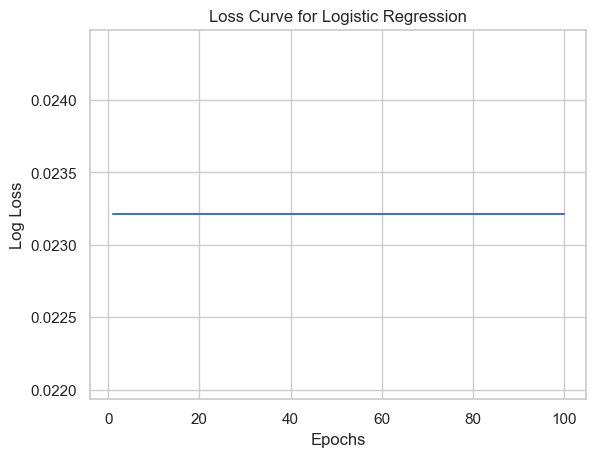

In [411]:
from sklearn.metrics import log_loss

lr = CatBoostClassifier(border_count= 32, depth= 3, iterations= 100, l2_leaf_reg= 1, learning_rate= 0.05)

# Lists to store training losses
train_losses = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model and recording the loss for each iteration
for _ in range(100):
    lr.fit(X_train, y_train)
    y_pred = lr.predict_proba(X_test)  # Predict probabilities
    loss = log_loss(y_test, y_pred)  # Calculate log loss
    train_losses.append(loss)

# Create a loss curve
plt.plot(range(1, len(train_losses) + 1), train_losses)
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Loss Curve for Logistic Regression')
plt.show()

# ROC Curve

In [412]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


In [416]:
y_probabilities = model.predict_proba(X_test)[:, 1]


In [420]:
fpr, tpr, thresholds = roc_curve(y_test_g, y_pred_g)
roc_auc = roc_auc_score(y_test, y_probabilities)


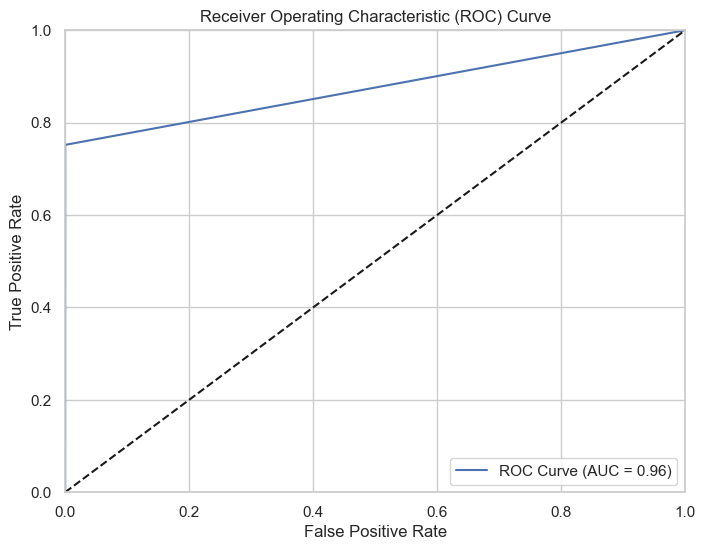

In [421]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [469]:
import matplotlib.pyplot as plt

# Updated values for different models
models = ['CatBoost', 'Bagging', 'Adaboost', 'Gradient Boosting']
accuracy_scores = [0.9960081610928768, 0.9966364812419146, 0.9961559312010251, 0.9958109506677838]
precision_scores = [0.7518796992481203, 0.7995391705069125, 0.7605633802816901, 0.7621283255086072]
recall_scores = [0.9925558312655087, 0.9886039886039886,  0.9938650306748467, 0.9643564356435643]
f1_scores = [0.8556149732620321, 0.884076433121019, 0.8617021276595745, 0.8513986013986014]

# Plotting the line graph
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy_scores, marker='o', label='Accuracy')
plt.plot(models, precision_scores, marker='o', label='Precision')
plt.plot(models, recall_scores, marker='o', label='Recall')
plt.plot(models, f1_scores, marker='o', label='F1 Score')

plt.title('Model Evaluation Metrics')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
